In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Custom models
from utils import (
    remove_unidimensional_outliers,
    plot_continuous_distributions,
    plot_discrete_distributions,
    plot_correlation_heatmap,
    scattermapbox
)

# Load dataset
customer_info = pd.read_csv("customer_info.csv")

In [50]:
customer_info.head()

,Unnamed: 0,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,0,29930,April Clark,female,01/15/1972 02:27 PM,2.0,2.0,1.0,4.0,7789.0,...,1894.0,457.0,412.0,428.0,386.0,0.158741,2018.0,NaN,38.721807,-9.125534
1,1,6813,Bsc. Paul Ketchum,male,07/31/1944 10:53 AM,0.0,1.0,0.0,4.0,8653.0,...,346.0,394.0,75.0,226.0,73.0,1.227890,2013.0,971840.0,38.734668,-9.163533
2,2,39451,Mary Downing,female,11/13/1989 02:11 PM,2.0,3.0,0.0,7.0,15605.0,...,1971.0,920.0,335.0,192.0,319.0,0.101598,2011.0,NaN,38.787126,-9.147077
3,3,21557,Manuel Kueny,male,08/09/1976 06:23 AM,0.0,0.0,1.0,1.0,13440.0,...,785.0,139.0,679.0,270.0,221.0,0.259943,2009.0,NaN,38.741816,-9.159700
4,4,16415,Phd. Curtis Tharp,male,07/11/1966 08:12 AM,1.0,1.0,1.0,5.0,49250.0,...,1492.0,1046.0,112.0,144.0,244.0,0.317822,2012.0,925367.0,38.785921,-9.149221


In [51]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               34060 non-null  int64  
 1   customer_id                              34060 non-null  int64  
 2   customer_name                            34060 non-null  object 
 3   customer_gender                          34060 non-null  object 
 4   customer_birthdate                       33719 non-null  object 
 5   kids_home                                33311 non-null  float64
 6   teens_home                               33277 non-null  float64
 7   number_complaints                        33038 non-null  float64
 8   distinct_stores_visited                  33379 non-null  float64
 9   lifetime_spend_groceries                 34060 non-null  float64
 10  lifetime_spend_electronics               34060

In [52]:
# Set id as index
customer_info.set_index('customer_id', inplace=True)

# Drop unnecessary column
customer_info.drop(columns=["Unnamed: 0"], inplace=True)

# Convert customer_birthdate to datetime format (handling errors)
customer_info["customer_birthdate"] = pd.to_datetime(customer_info["customer_birthdate"], errors="coerce")

# Extract age from birthdate
customer_info["customer_age"] = customer_info["customer_birthdate"].apply(lambda x: 2025 - x.year if pd.notnull(x) else np.nan)

# Drop birthdate column
customer_info.drop(columns=["customer_birthdate"], inplace=True)

# Encode gender (Female = 1, Male = 0)
customer_info["customer_gender"] = customer_info["customer_gender"].map({"female": 1, "male": 0})


C:\Users\User\AppData\Local\Temp\ipykernel_25384\3618888550.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [53]:
# For loyalty card number we can assume the missings dont have a loyalty card
customer_info["loyalty_card_number"] = [0 if pd.isna(number) else 1 for number in customer_info["loyalty_card_number"]]
customer_info = customer_info.rename(columns={"loyalty_card_number": "has_loyalty_card"})


In [54]:
# Check for duplicates
customer_info[customer_info.duplicated()]

,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,has_loyalty_card,latitude,longitude,customer_age
customer_id,,,,,,,,,,,,,,,,,,,,,


In [55]:
# Geographical exploration
scattermapbox(df=customer_info, zoom=11, width=1000, height=1000, color='lifetime_spend_groceries')

The people in the cluster in Alfragide differ a lot from others. We will cluster them later with the help of customer_info_backup and dropthem from customer_info now to avoid the multidimensional outlier methods deleting them.

In [56]:
min_lat, max_lat = 38.7221, 38.7240
min_lon, max_lon = -9.2148, -9.2130

# Filter clients from that area
geo_cluster = customer_info[
    (customer_info['latitude'].between(min_lat, max_lat)) &
    (customer_info['longitude'].between(min_lon, max_lon))
]

In [57]:
customer_info_backup = customer_info.copy()

In [58]:
customer_info_backup.to_csv("customer_info_backup.csv", index=True)


In [60]:
customer_info=customer_info.drop(geo_cluster.index, axis=0)

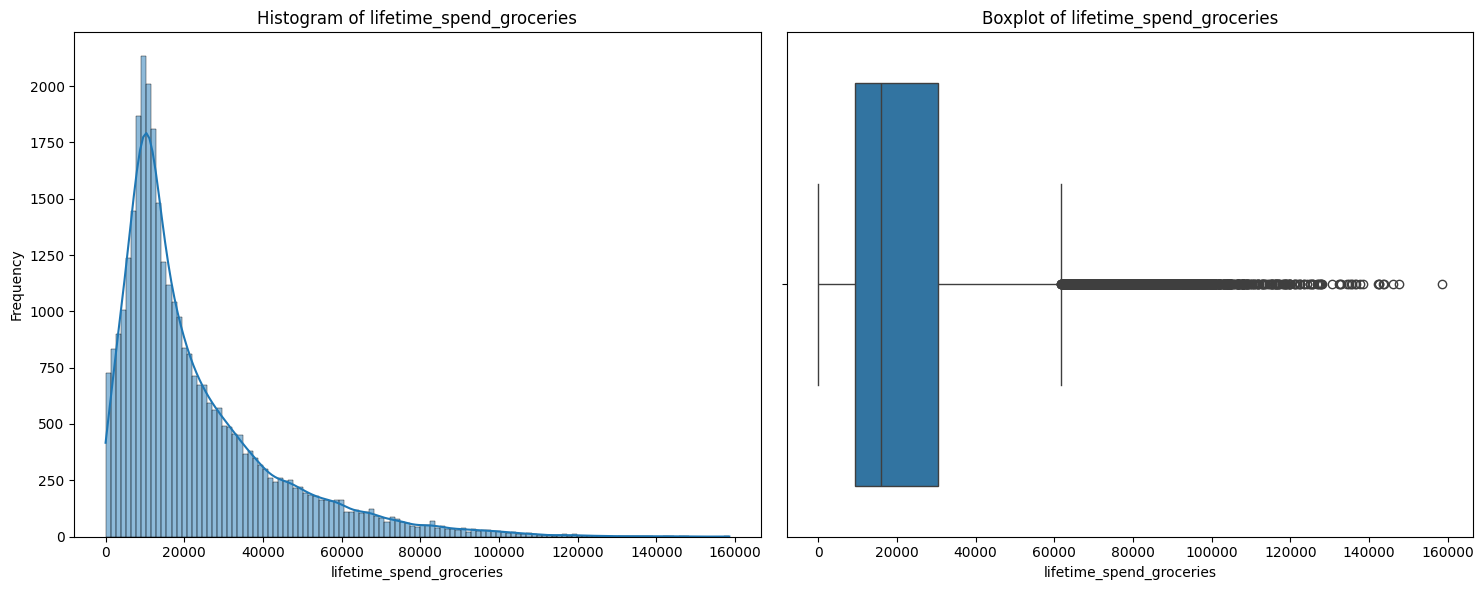

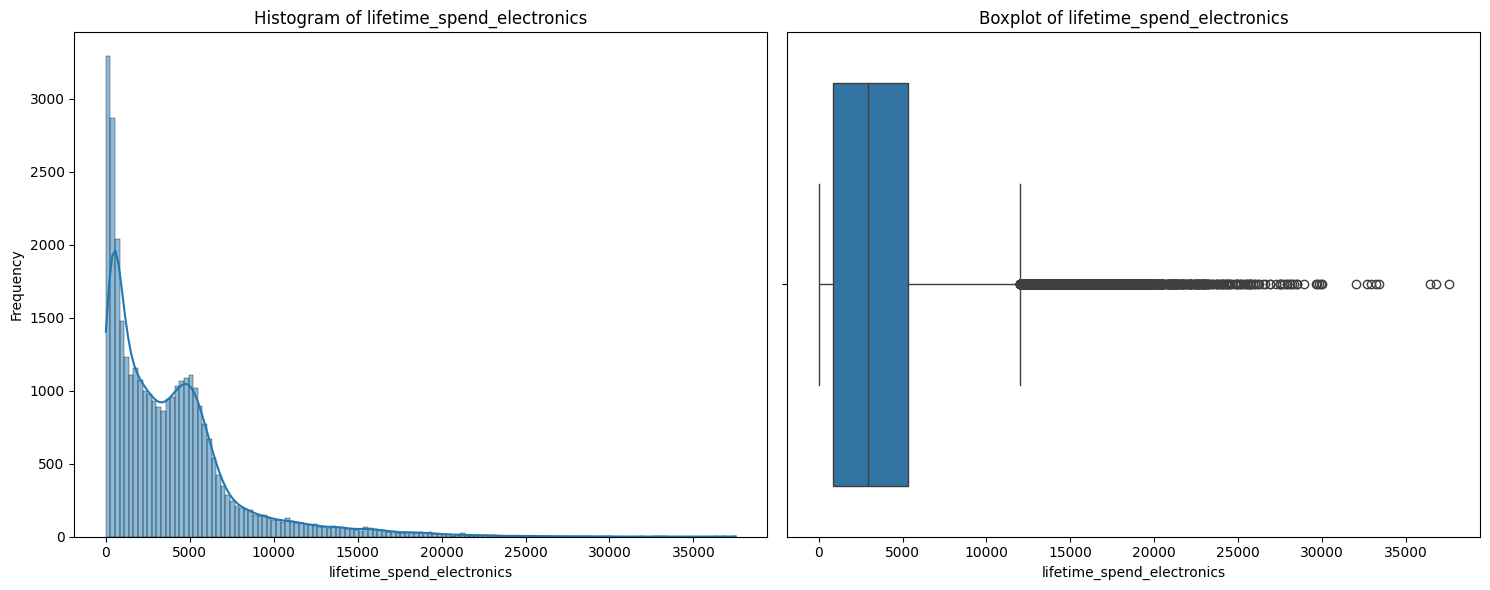

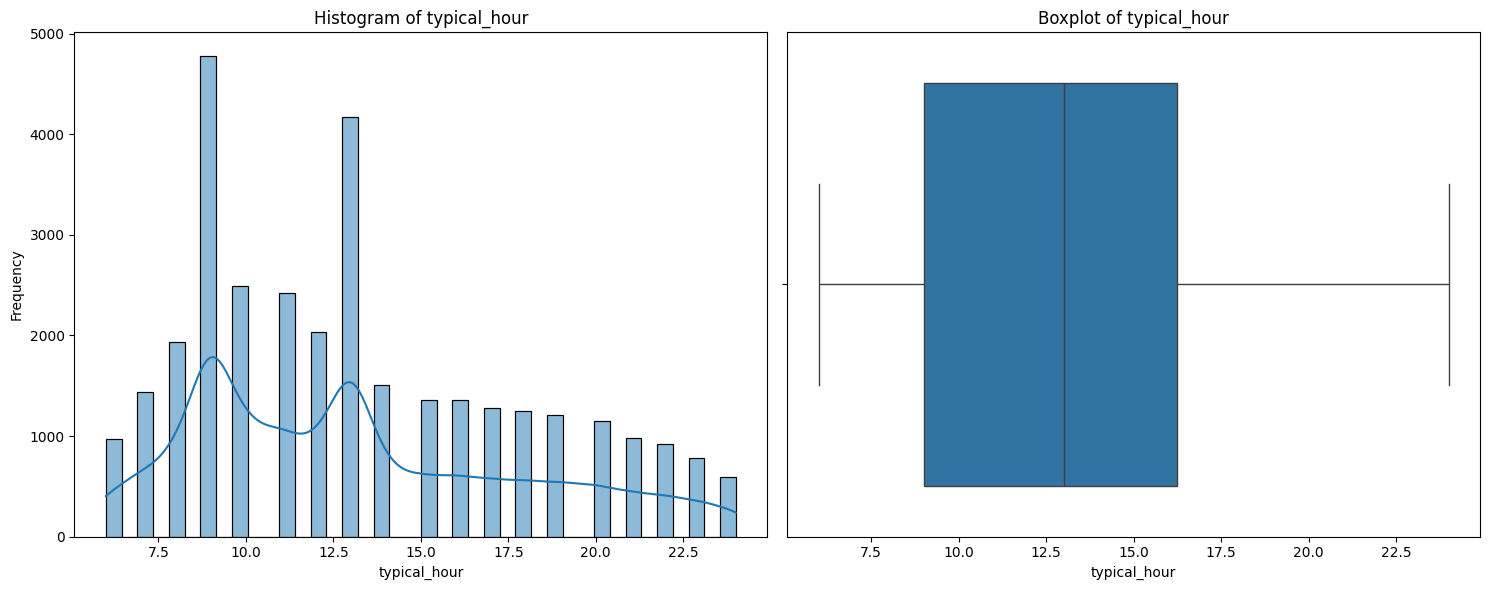

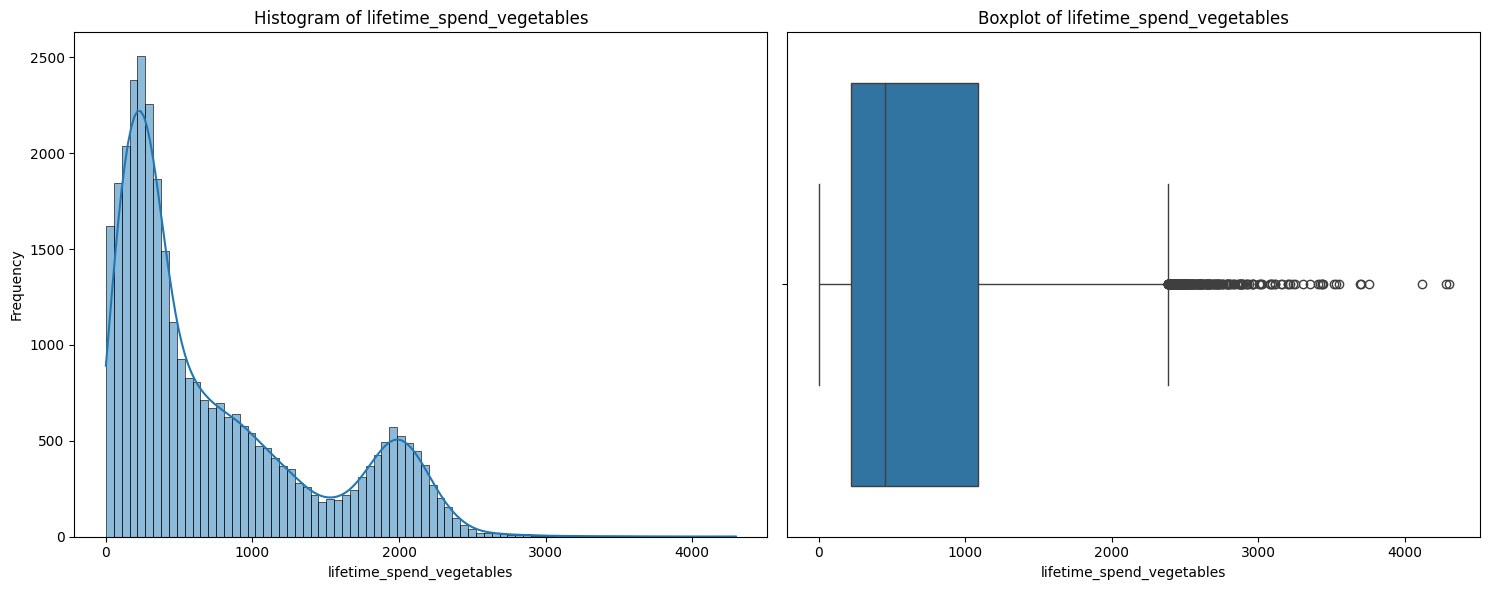

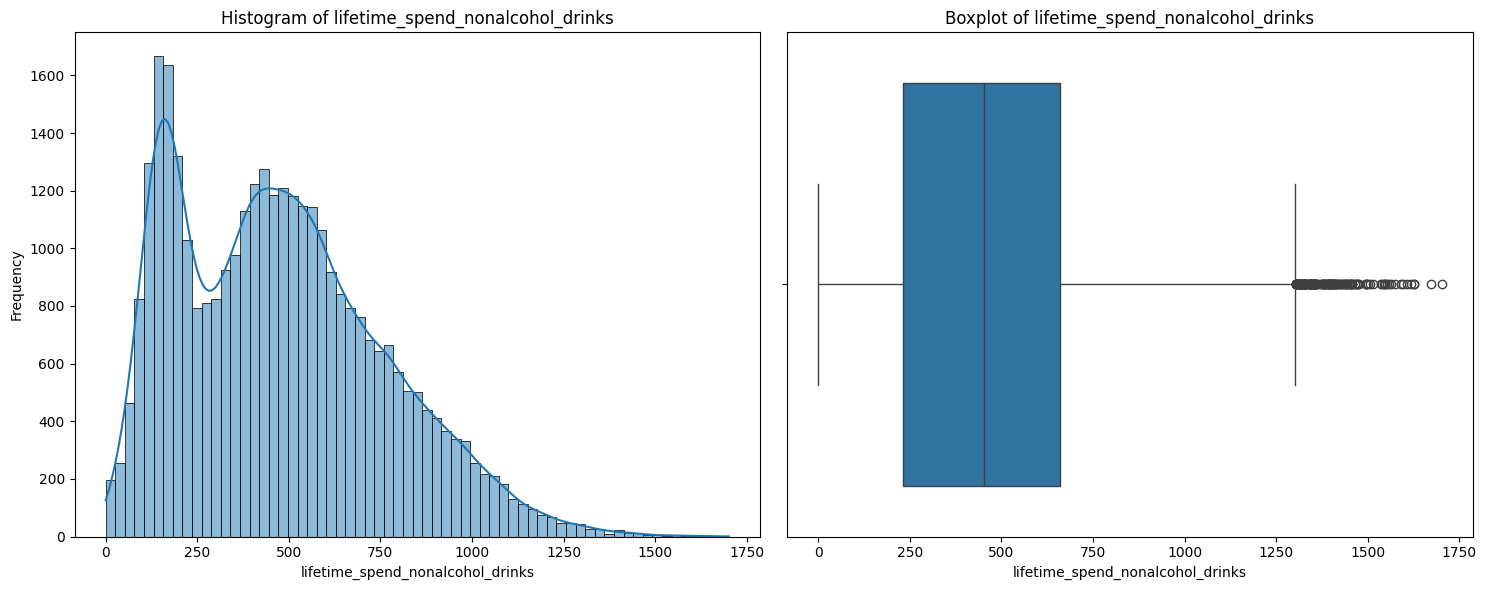

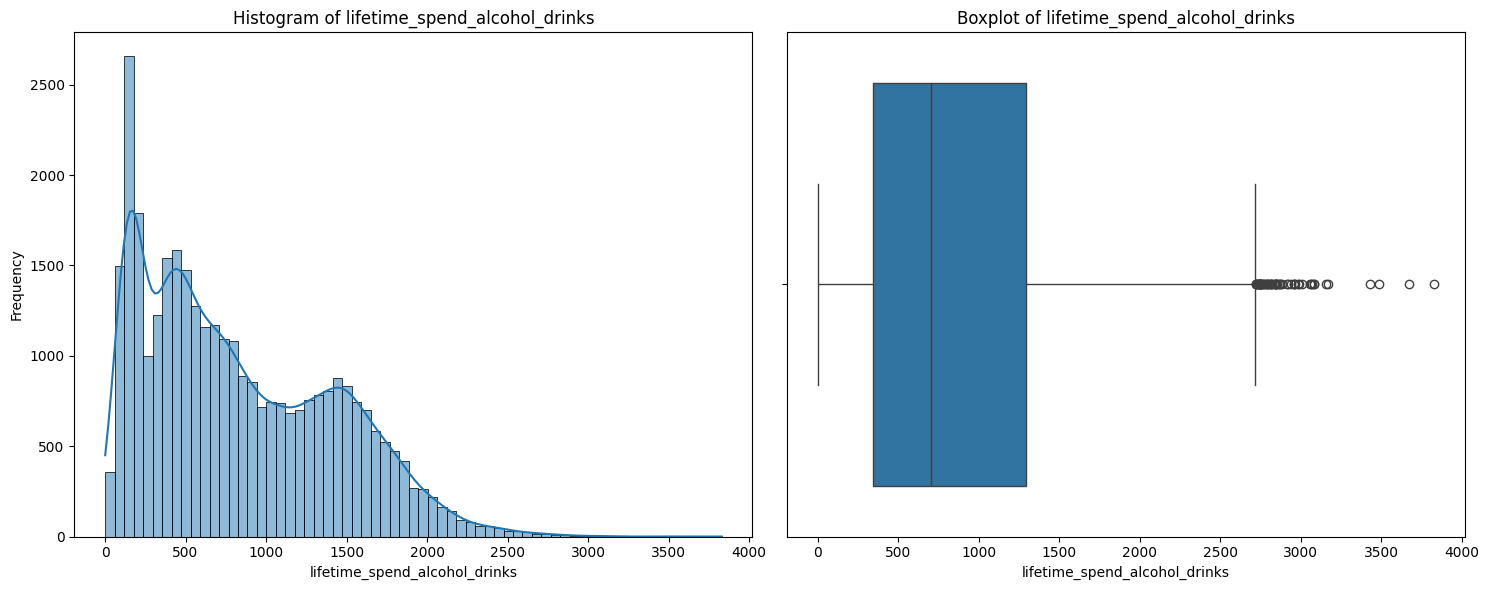

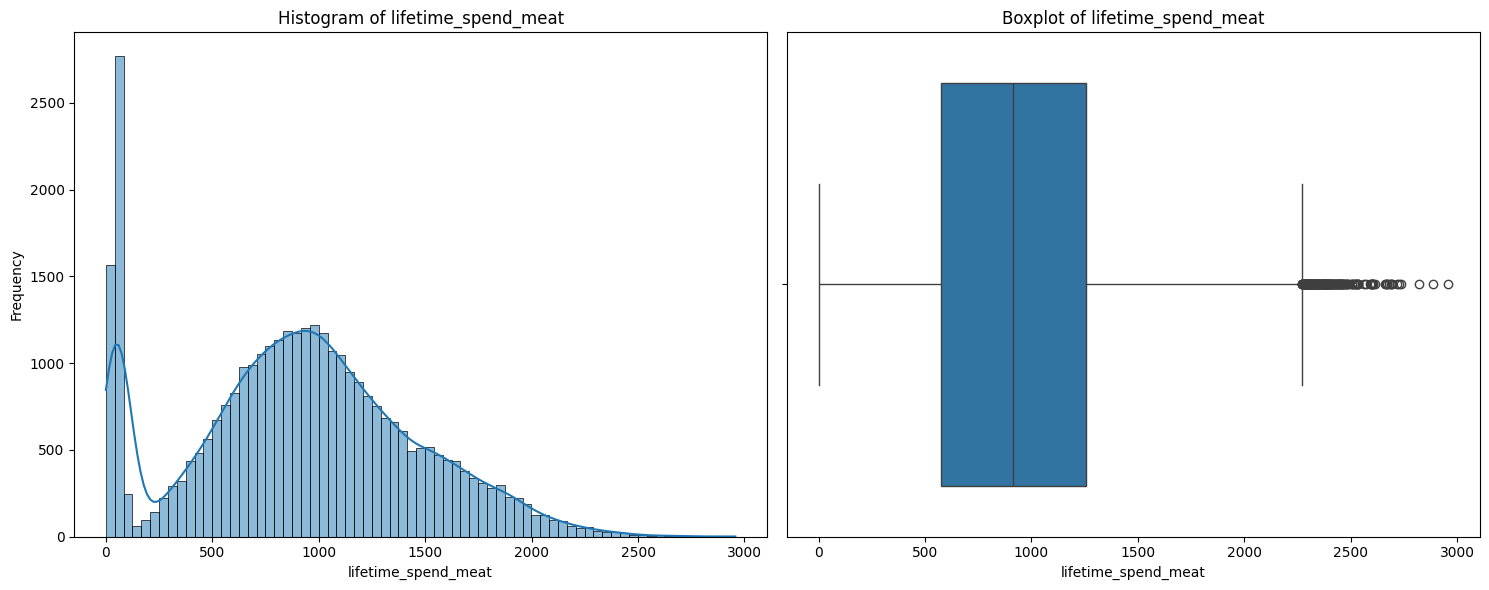

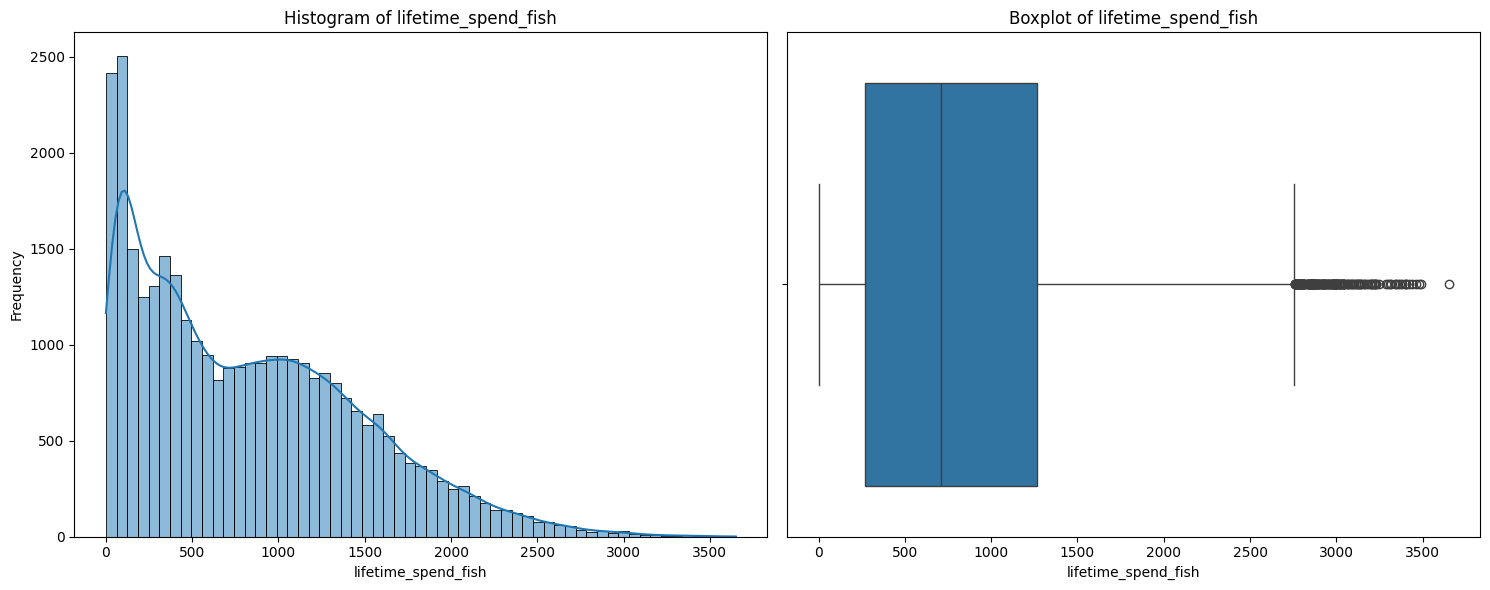

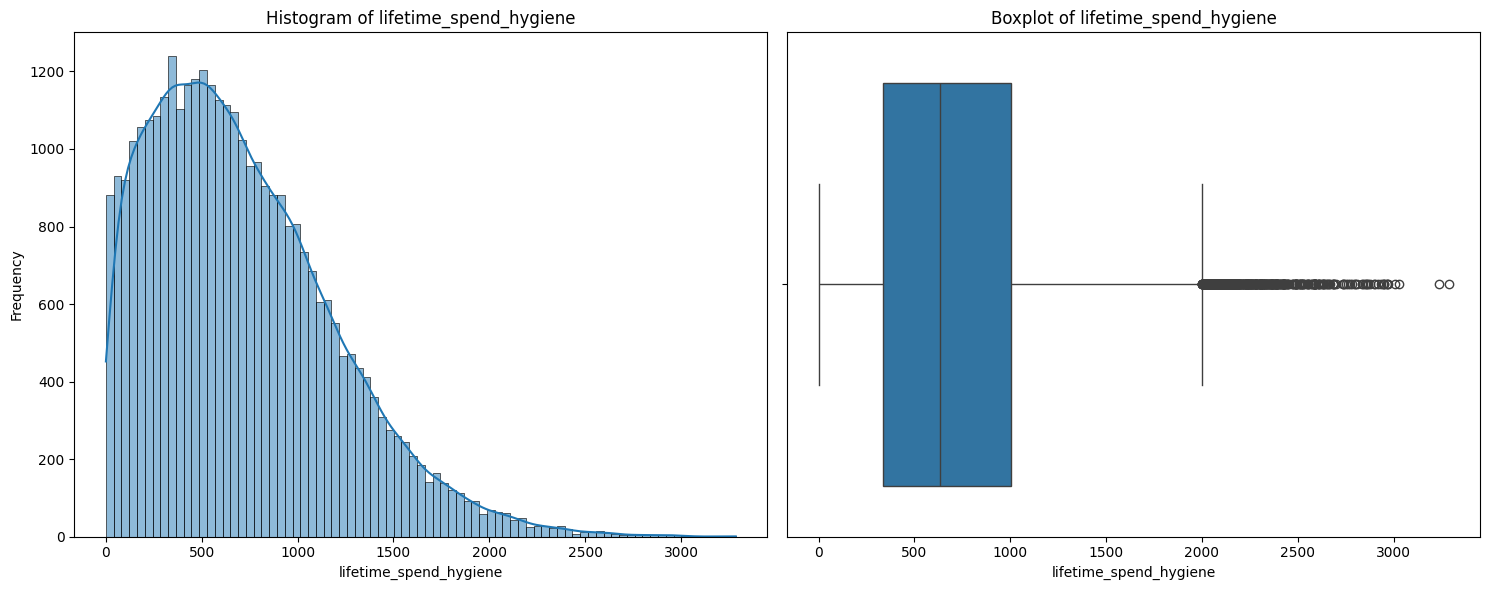

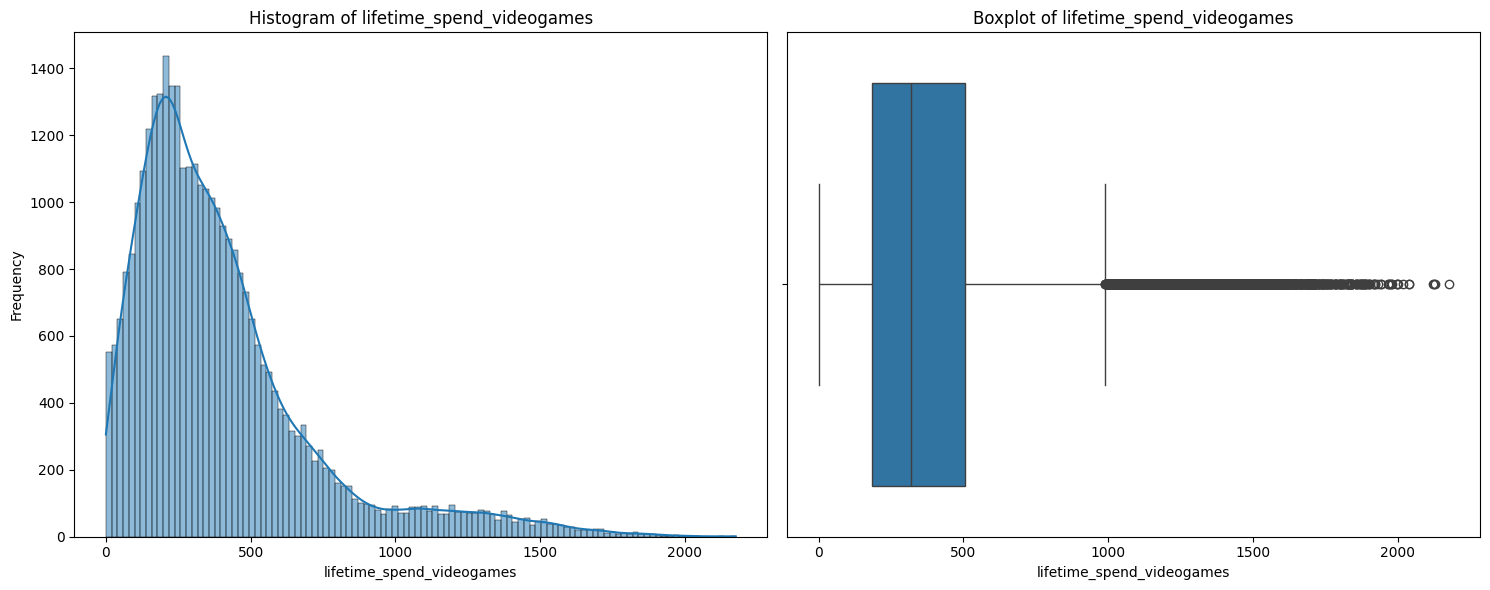

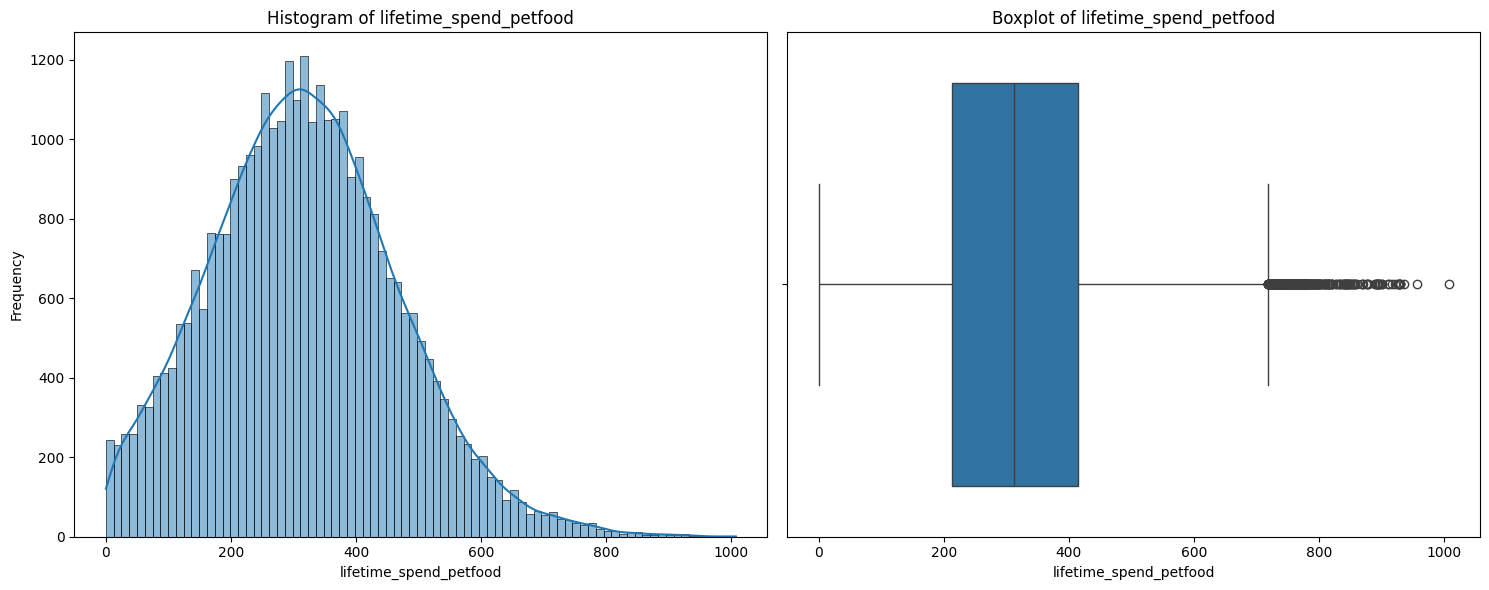

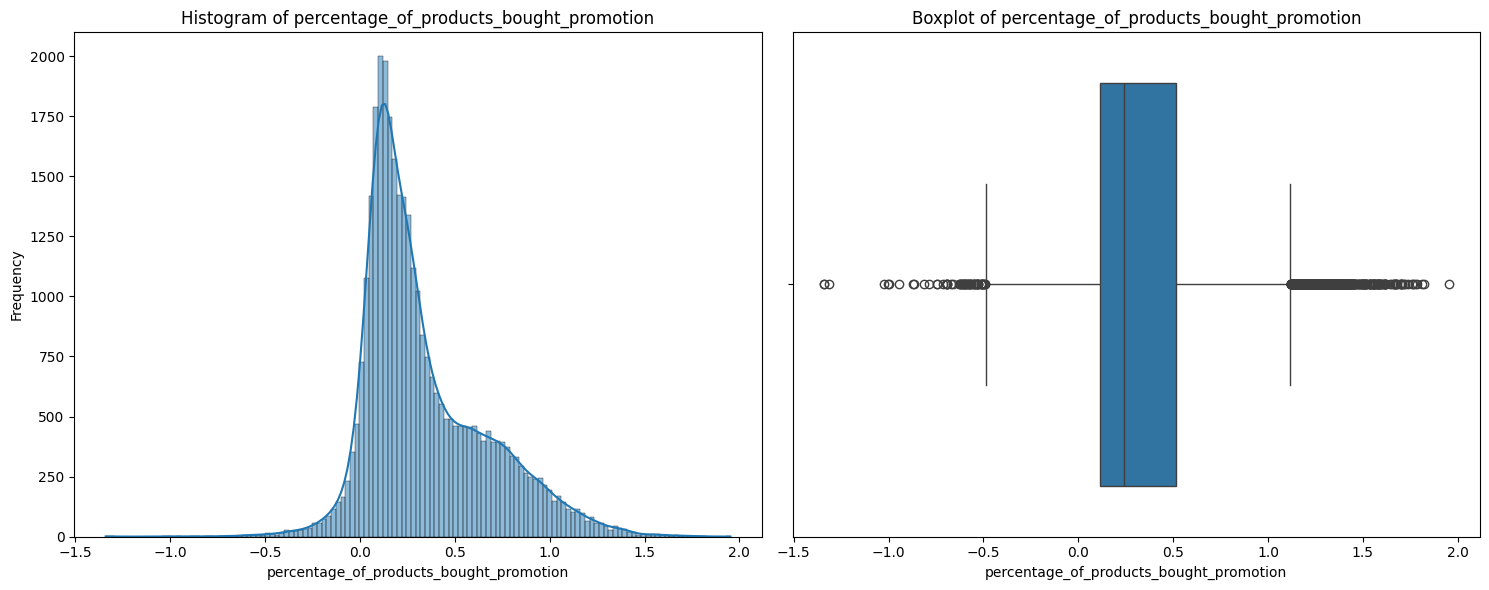

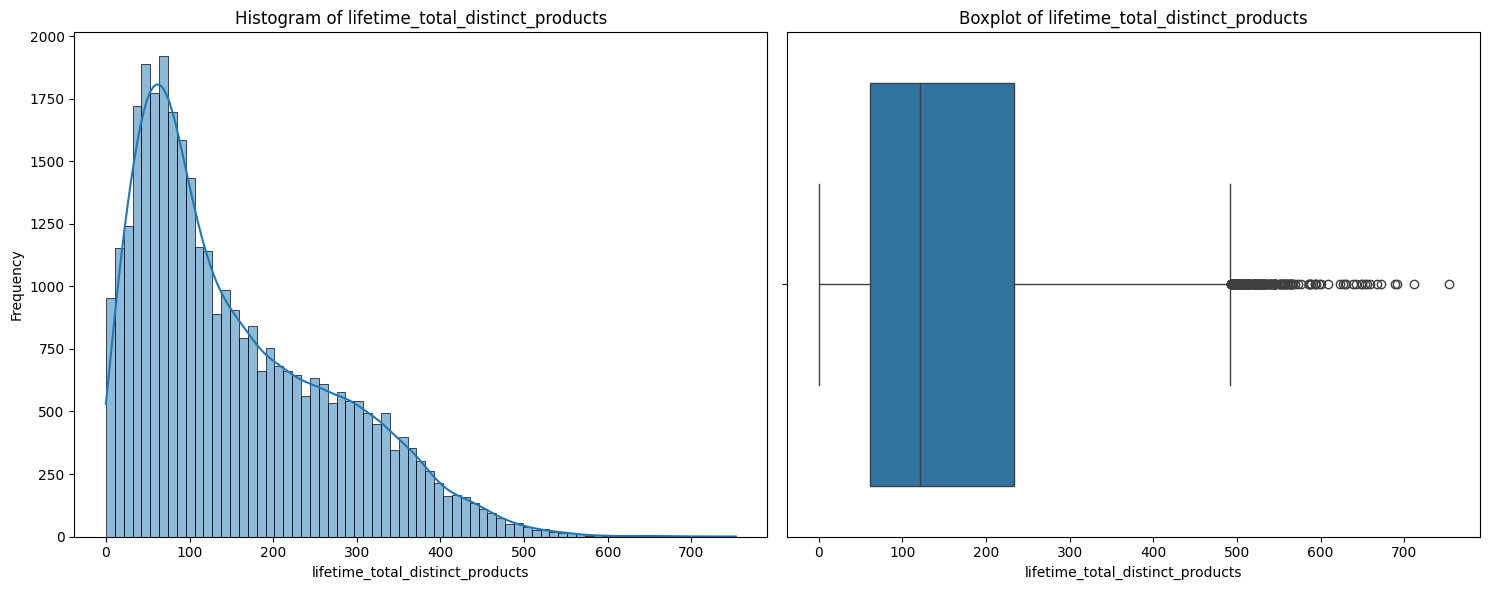

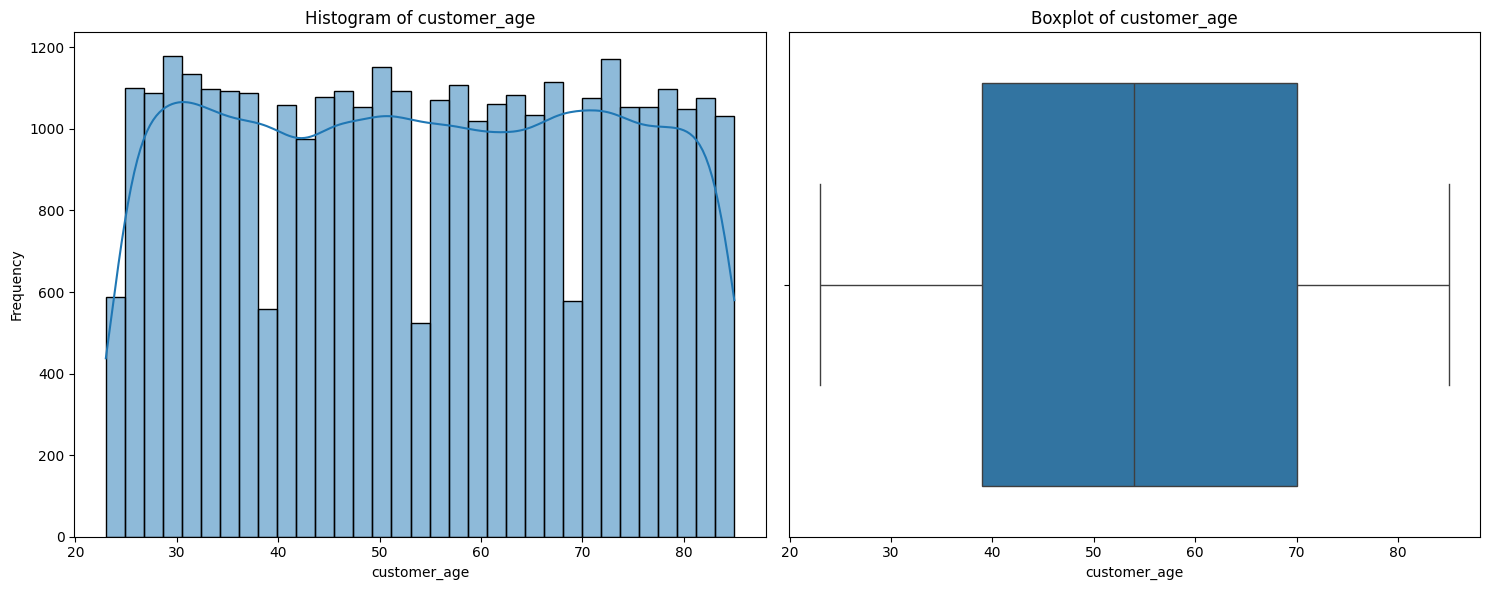

In [62]:
continuous_vars = customer_info[['lifetime_spend_groceries', 'lifetime_spend_electronics', 'typical_hour', 
                   'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 
                   'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat', 'lifetime_spend_fish', 
                   'lifetime_spend_hygiene', 'lifetime_spend_videogames', 'lifetime_spend_petfood', 
                   'percentage_of_products_bought_promotion','lifetime_total_distinct_products','customer_age']]



discrete_vars = customer_info[['kids_home','customer_gender','teens_home', 'number_complaints', 'distinct_stores_visited', 'has_loyalty_card']]
# do for age aswell

# Histograms and boxplots for continuous variables
plot_continuous_distributions(customer_info, continuous_vars)



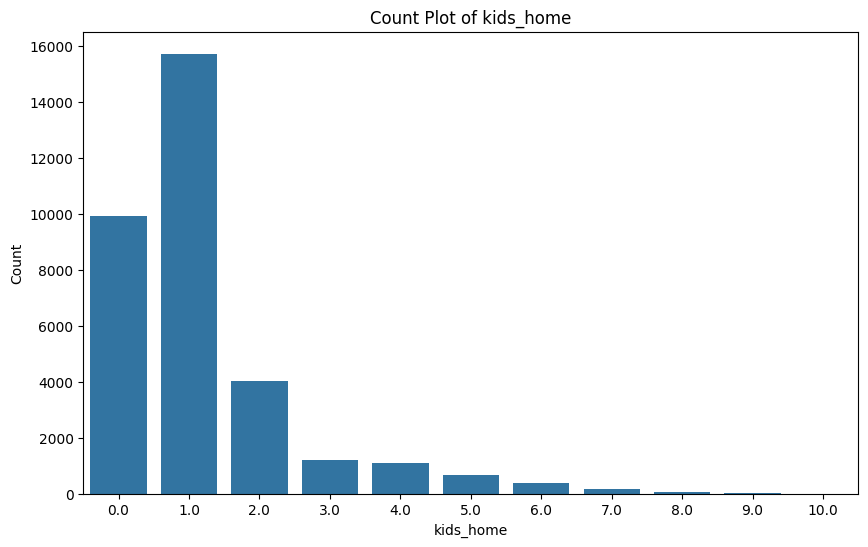

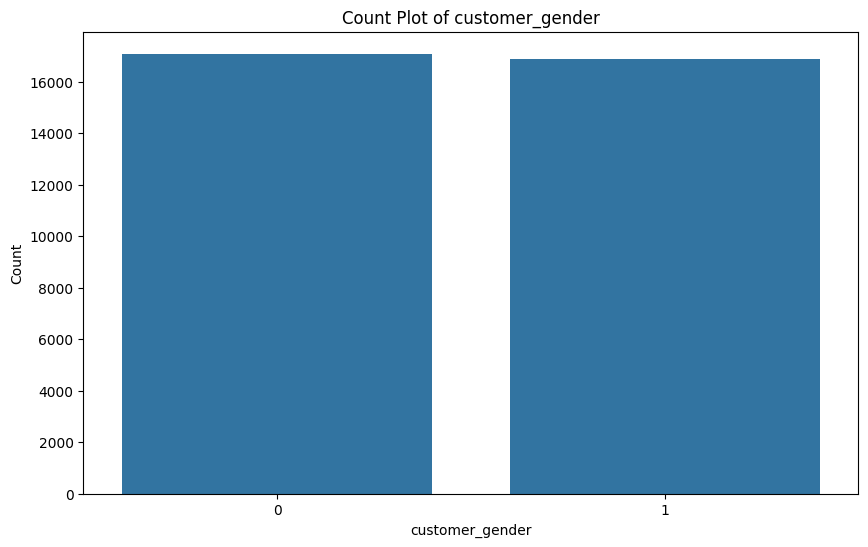

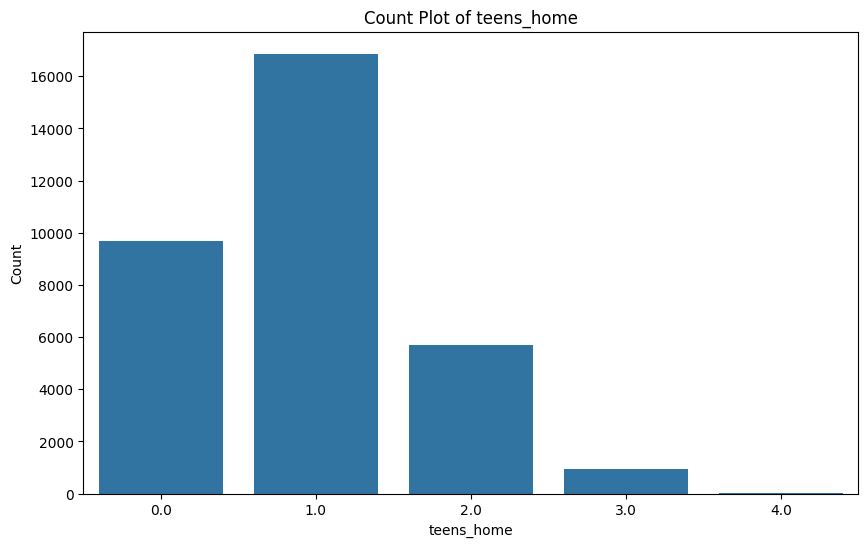

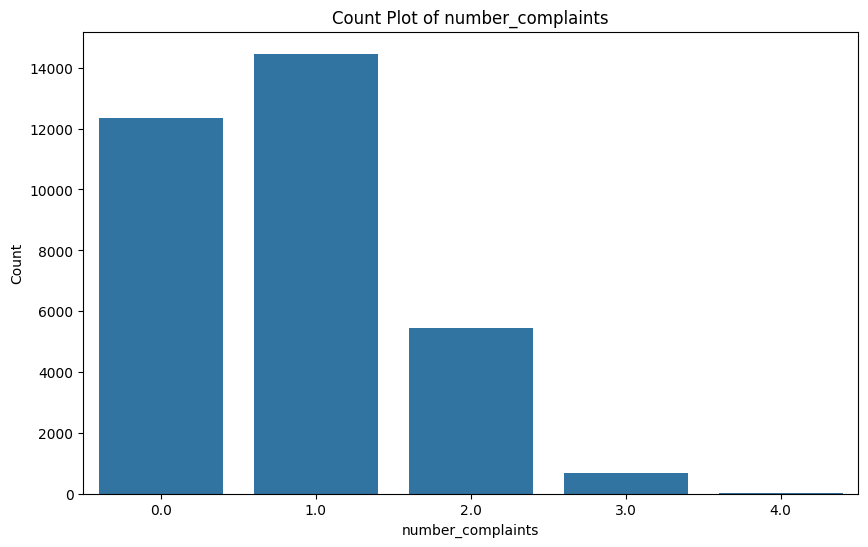

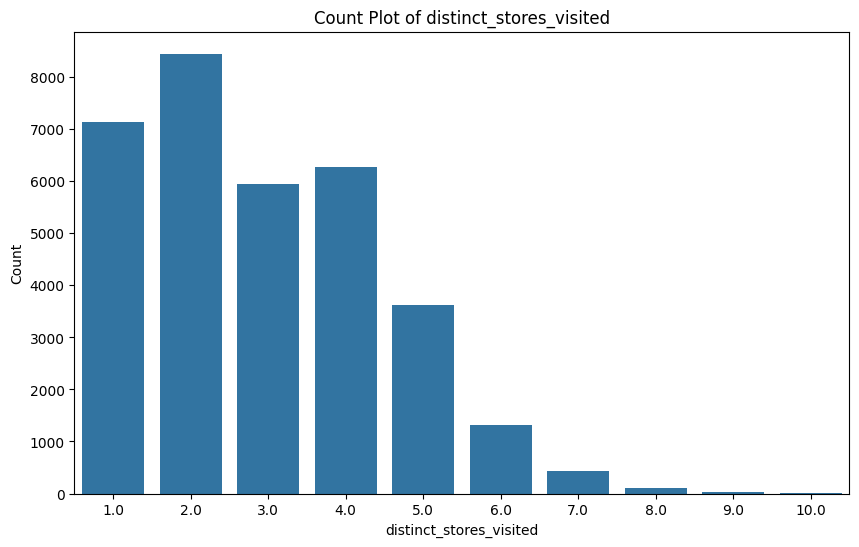

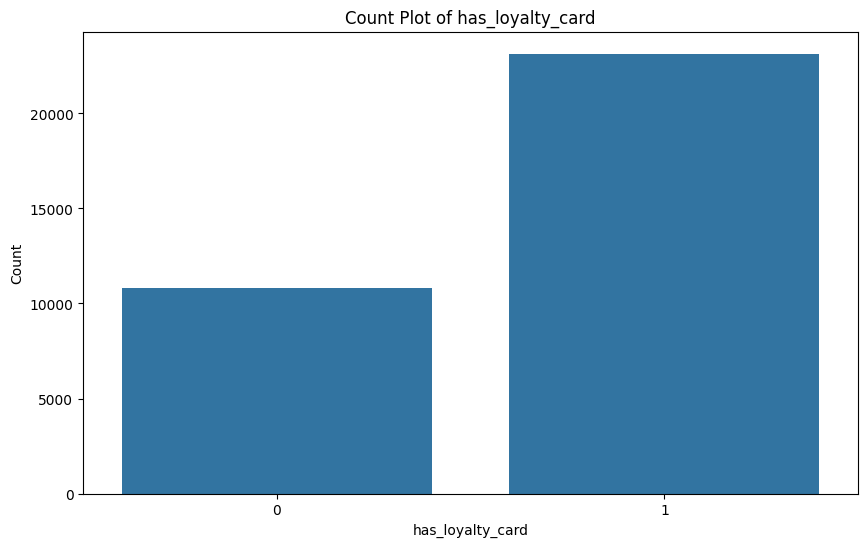

In [63]:
# Countplots for discrete variables
plot_discrete_distributions(customer_info, discrete_vars)


#   plt.figure(figsize=(length(continuous_vars)/2, 2))

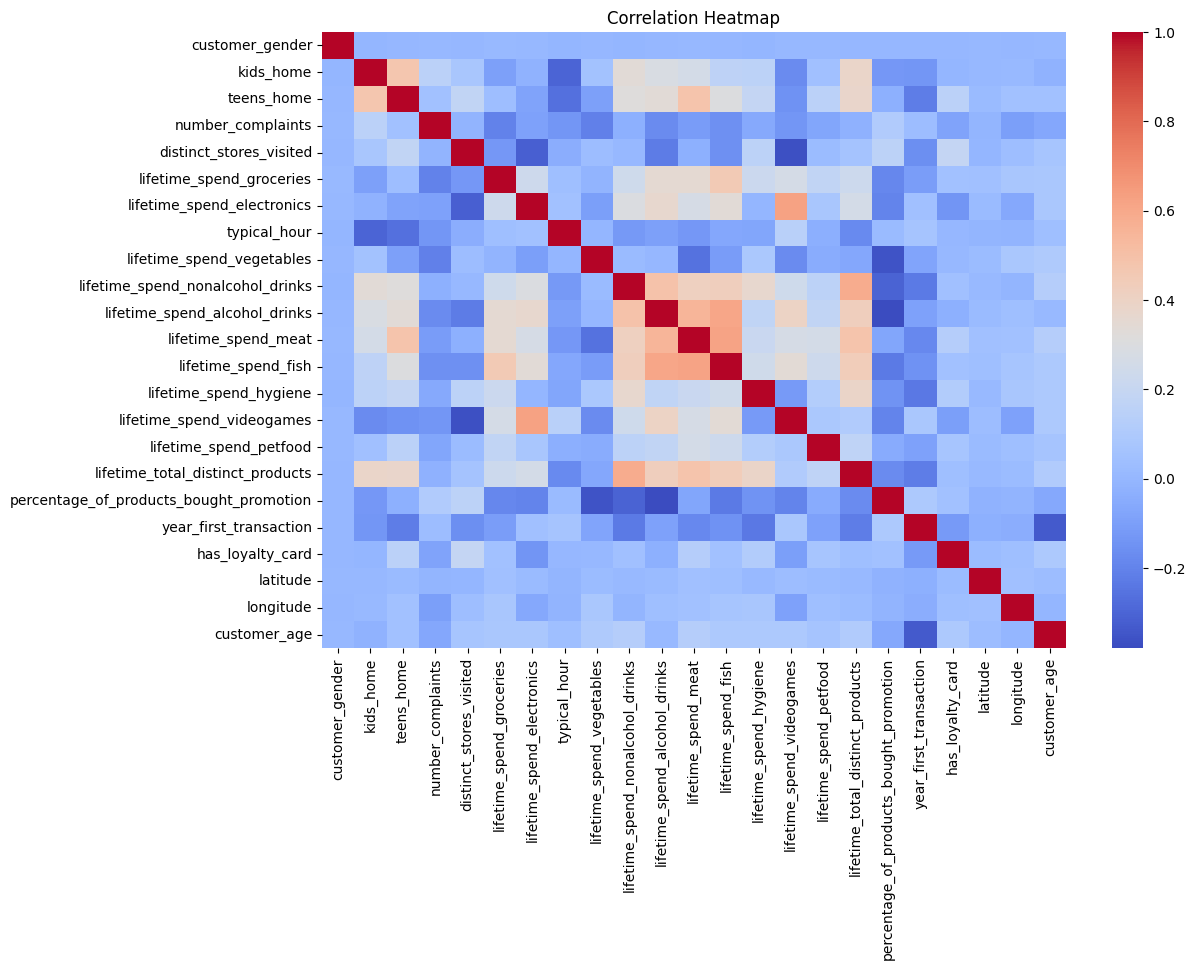

In [64]:
# Correlation heatmap
plot_correlation_heatmap(customer_info)


## Missing Values

In [65]:
# Missing values
missings = pd.DataFrame({
    "n_missings": customer_info.isnull().sum(),
    "percentage_missings": (customer_info.isnull().sum() / len(customer_info)) * 100
})
print(missings)
# No cols are missing more than 35% observations

# Filter rows with more than 8 missing values (over 35% observations)
rows_with_9plus_missing = customer_info[customer_info.isnull().sum(axis=1) > 8]
print(f"\nNumber of observations with more than 8 missing values: {rows_with_9plus_missing.shape[0]}") # Zero


                                         n_missings  percentage_missings
customer_name                                     0             0.000000
customer_gender                                   0             0.000000
kids_home                                       744             2.190039
teens_home                                      779             2.293065
number_complaints                              1022             3.008360
distinct_stores_visited                         678             1.995761
lifetime_spend_groceries                          0             0.000000
lifetime_spend_electronics                        0             0.000000
typical_hour                                   1360             4.003297
lifetime_spend_vegetables                      1019             2.999529
lifetime_spend_nonalcohol_drinks                  0             0.000000
lifetime_spend_alcohol_drinks                   681             2.004592
lifetime_spend_meat                               0

In [67]:
# Handle missing values
customer_info.fillna(customer_info.median(numeric_only=True), inplace=True)  # Fill numeric NaNs with median
customer_info.fillna(customer_info.mode().iloc[0], inplace=True)  # Fill categorical NaNs with mode

missings = pd.DataFrame({
    "n_missings": customer_info.isnull().sum(),
    "percentage_missings": (customer_info.isnull().sum() / len(customer_info)) * 100
})
print(missings)


                                         n_missings  percentage_missings
customer_name                                     0                  0.0
customer_gender                                   0                  0.0
kids_home                                         0                  0.0
teens_home                                        0                  0.0
number_complaints                                 0                  0.0
distinct_stores_visited                           0                  0.0
lifetime_spend_groceries                          0                  0.0
lifetime_spend_electronics                        0                  0.0
typical_hour                                      0                  0.0
lifetime_spend_vegetables                         0                  0.0
lifetime_spend_nonalcohol_drinks                  0                  0.0
lifetime_spend_alcohol_drinks                     0                  0.0
lifetime_spend_meat                               0

## Outliers

In [69]:
# Outliers will be handled manually since the interquartile method would delete too many observations
# Remove outliers for each continuous variable  
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_groceries', 0, 130000)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_electronics', 0, 30000)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_vegetables', 0, 3200)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_nonalcohol_drinks', 0, 1600)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_alcohol_drinks', 0, 3500)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_meat', 0, 2800)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_fish', 0, 3500)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_hygiene', 0, 2900)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_videogames', 0, 1800)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_spend_petfood', 0, 900)
customer_info = remove_unidimensional_outliers(customer_info, 'lifetime_total_distinct_products', 0, 650)
customer_info = remove_unidimensional_outliers(customer_info, 'percentage_of_products_bought_promotion', 0, 100)


In [71]:
print(len(customer_info))
print(f'{33972-len(customer_info)} observations removed')

31586
2386 observations removed


In [72]:
cust_spend = customer_info[[
    'lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
    'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat',
    'lifetime_spend_fish', 'lifetime_spend_hygiene', 'lifetime_spend_videogames',
    'lifetime_spend_petfood', 'lifetime_total_distinct_products'
]]

### DBScan for Multidimensional Outliers

In [73]:
scaler = StandardScaler()
scaled_spend = scaler.fit_transform(cust_spend)

In [74]:
db = DBSCAN(eps=1.8, min_samples=15, n_jobs=-1)
labels = db.fit_predict(scaled_spend)

In [75]:
print(f"Multidimensional outliers removed: {(labels == -1).sum()}")

Multidimensional outliers removed: 941


In [76]:
customer_info = customer_info[labels != -1]

In [77]:
# Save preprocessed data
customer_info.to_csv("customer_info_preprocessed.csv", index=True)

In [78]:
customer_info

,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,has_loyalty_card,latitude,longitude,customer_age
customer_id,,,,,,,,,,,,,,,,,,,,,
29930,April Clark,1,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,726.0,...,457.0,412.0,428.0,386.0,0.158741,2018.0,0,38.721807,-9.125534,53.0
6813,Bsc. Paul Ketchum,0,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,792.0,...,394.0,75.0,226.0,73.0,1.227890,2013.0,1,38.734668,-9.163533,81.0
39451,Mary Downing,1,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,1585.0,...,920.0,335.0,192.0,319.0,0.101598,2011.0,0,38.787126,-9.147077,36.0
21557,Manuel Kueny,0,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,28.0,...,139.0,679.0,270.0,221.0,0.259943,2009.0,0,38.741816,-9.159700,49.0
16415,Phd. Curtis Tharp,0,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,258.0,...,1046.0,112.0,144.0,244.0,0.317822,2012.0,1,38.785921,-9.149221,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37071,Mary Diaz,1,1.0,1.0,0.0,2.0,62321.0,5250.0,16.0,813.0,...,1048.0,379.0,258.0,163.0,0.162331,2018.0,0,38.750813,-9.103808,26.0
27422,John Gross,0,1.0,1.0,0.0,3.0,16084.0,3796.0,13.0,502.0,...,949.0,263.0,319.0,379.0,0.614179,2019.0,1,38.745020,-9.169168,41.0
39540,Kathleen Harper,1,1.0,0.0,1.0,2.0,14631.0,8784.0,17.0,402.0,...,368.0,804.0,110.0,228.0,0.535617,2018.0,0,38.767834,-9.172368,25.0
